In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [3]:
# 1. 데이터 로드 및 전처리
# 신용카드 데이터셋을 불러옵니다. 

df = pd.read_csv('./creditcard.csv')

In [4]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.info

<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

In [7]:
# 결측치 홗인

df.isnull().values.any()

False

In [8]:
LABELS = ["Normal", "Fraud"]

/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_87609/2107955042.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['Class'], sort = True)


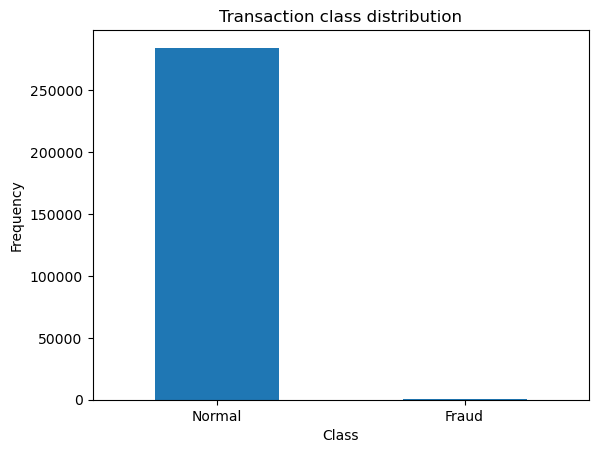

In [9]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [10]:
frauds = df[df.Class == 1]
normal = df[df.Class == 0]
frauds.shape

(492, 31)

In [11]:
normal.shape

(284315, 31)

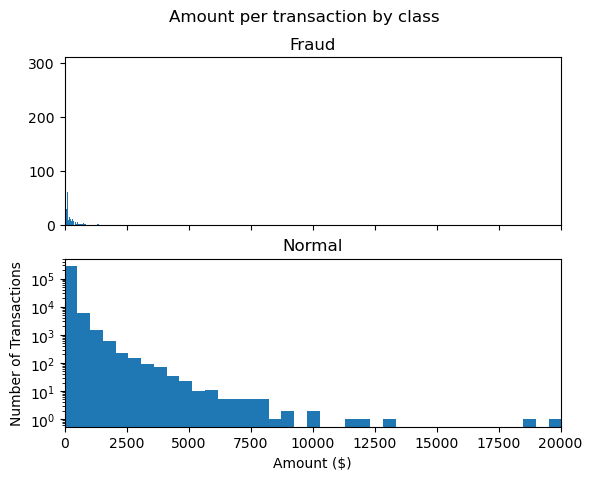

In [12]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')

bins = 50

ax1.hist(frauds.Amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')

plt.show();

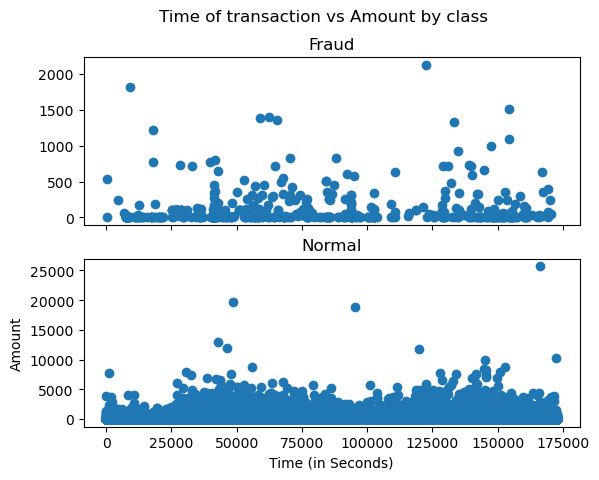

In [13]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(frauds.Time, frauds.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler

data = df.drop(['Time'], axis=1)

data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

In [15]:
RANDOM_SEED = 42

In [16]:
# 데이터셋을 80% 훈련 세트, 20% 테스트 세트로 무작위 분할합니다. RANDOM_SEED를 설정해 재현 가능성을 확보합니다.
X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)

# 훈련 데이터에서 'Class'가 0인(정상 거래인) 데이터만 선택합니다.
X_train = X_train[X_train.Class == 0]

# 'Class' 열을 제거하여 입력 데이터만 남깁니다.
X_train = X_train.drop(['Class'], axis=1)

# 테스트 세트에서 타겟 변수인 'Class' 열을 추출하여 y_test에 저장합니다.
y_test = X_test['Class']

# 테스트 세트에서도 'Class' 열을 제거하여 입력 데이터만 남깁니다.
X_test = X_test.drop(['Class'], axis=1)

# X_train과 X_test를 NumPy 배열로 변환하여 머신러닝 모델에 적합한 형식으로 만듭니다.
X_train = X_train.values
X_test = X_test.values

# 훈련 데이터의 샘플 수와 특징(feature)의 개수를 확인합니다.
X_train.shape

(227451, 29)

In [25]:
# 입력 데이터의 차원 수를 정의합니다. X_train의 열 개수와 동일하게 설정합니다.
input_dim = X_train.shape[1]

# 인코딩 차원 수를 설정합니다. 이는 잠재 공간(latent space)의 크기이며, 원하는 값으로 조정할 수 있습니다.
encoding_dim = 14  # 압축할 차원의 크기

# 입력 레이어를 정의합니다. 입력 데이터의 형태를 지정합니다.
input_layer = Input(shape=(input_dim,))

# 인코딩 과정: 입력 레이어에서 14개의 뉴런을 가진 은닉층으로 압축합니다.
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# 인코딩된 값을 절반 크기의 은닉층으로 한 번 더 압축합니다.
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)

# 디코딩 과정: 인코딩된 값을 다시 원래 차원의 절반 크기 은닉층으로 복원합니다.
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)

# 원래 입력 차원 크기로 복원하는 출력 레이어를 정의합니다.
# 출력값은 0과 1 사이로 제한하기 위해 'sigmoid' 활성화 함수를 사용합니다.
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# 입력 레이어와 출력 레이어를 연결하여 오토인코더 모델을 생성합니다.
autoencoder = Model(inputs=input_layer, outputs=decoded)

# 오토인코더 모델을 컴파일합니다.
# Adam 옵티마이저를 사용하며, 학습률(learning_rate)은 0.001로 설정합니다.
# 손실 함수로 평균 제곱 오차(mse)를 사용하여 입력과 출력 간의 차이를 최소화합니다.
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# 모델의 요약 정보를 출력하여 모델 구조를 확인합니다.
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 29)]              0         
                                                                 
 dense_4 (Dense)             (None, 14)                420       
                                                                 
 dense_5 (Dense)             (None, 7)                 105       
                                                                 
 dense_6 (Dense)             (None, 7)                 56        
                                                                 
 dense_7 (Dense)             (None, 29)                232       
                                                                 
Total params: 813
Trainable params: 813
Non-trainable params: 0
_________________________________________________________________


In [18]:
# 훈련데이터의 0.1 을 validation data로 사용
history = autoencoder.fit(X_train, X_train, 
                          epochs=50, 
                          batch_size=256, 
                          shuffle=True, 
                          validation_split = 0.1)

Epoch 1/50


2024-10-07 15:39:11.502753: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-10-07 15:39:11.747381: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


800/800 [==============================] - ETA: 0s - loss: 1.0141

2024-10-07 15:39:19.048020: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


800/800 [==============================] - 8s 5ms/step - loss: 1.0141 - val_loss: 0.9095
Epoch 2/50
800/800 [==============================] - 4s 5ms/step - loss: 0.9030 - val_loss: 0.8717
Epoch 3/50
800/800 [==============================] - 4s 5ms/step - loss: 0.8808 - val_loss: 0.8579
Epoch 4/50
800/800 [==============================] - 4s 4ms/step - loss: 0.8661 - val_loss: 0.8446
Epoch 5/50
800/800 [==============================] - 3s 4ms/step - loss: 0.8571 - val_loss: 0.8363
Epoch 6/50
800/800 [==============================] - 4s 4ms/step - loss: 0.8494 - val_loss: 0.8305
Epoch 7/50
800/800 [==============================] - 3s 4ms/step - loss: 0.8446 - val_loss: 0.8263
Epoch 8/50
800/800 [==============================] - 4s 4ms/step - loss: 0.8413 - val_loss: 0.8236
Epoch 9/50
800/800 [==============================] - 3s 4ms/step - loss: 0.8388 - val_loss: 0.8212
Epoch 10/50
800/800 [==============================] - 4s 4ms/step - loss: 0.8368 - val_loss: 0.8198
Epoch 11/5

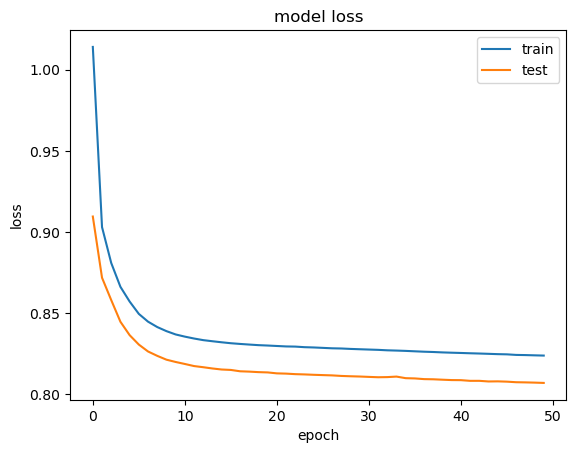

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [20]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

  91/1781 [>.............................] - ETA: 2s

2024-10-07 15:44:08.578117: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1781/1781 [==============================] - 3s 2ms/step


,reconstruction_error,true_class
count,56962.000000,56962.000000
mean,0.848493,0.001720
std,3.715131,0.041443
min,0.066218,0.000000
25%,0.261859,0.000000
50%,0.437748,0.000000
75%,0.705876,0.000000
max,259.754972,1.000000


In [21]:
error_df.head()

,reconstruction_error,true_class
43428,81.477370,1
49906,0.849811,0
29474,0.371129,0
276481,0.420187,0
278846,0.216796,0


In [22]:
# threshold 값을 조정하여 최선의 정확도를 얻음, 그래프로를 보고 결정

threshold = 15

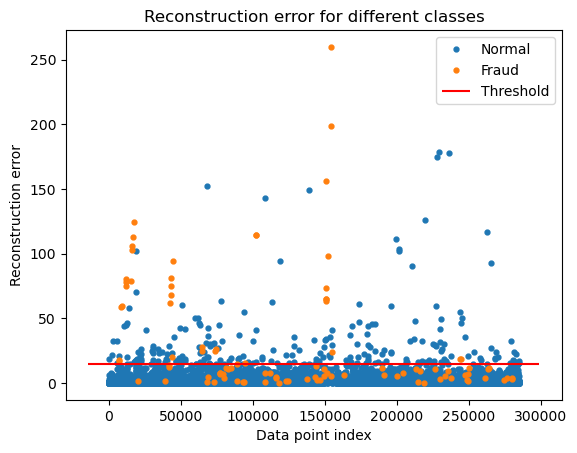

In [23]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

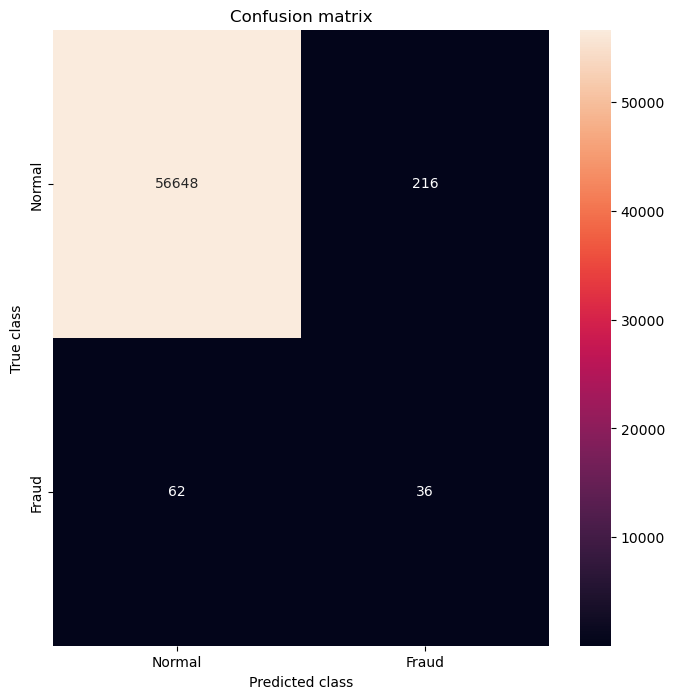

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.14      0.37      0.21        98

    accuracy                           1.00     56962
   macro avg       0.57      0.68      0.60     56962
weighted avg       1.00      1.00      1.00     56962



In [24]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))